**Урок 5**. На этом уроке мы изучим возможности библиотеки seaborn для анализа табличных данных.

При установке **Seaborn** поставляется с несколькими примерами наборов данных. Мы можем загрузить эти наборы данных и использовать их для обучения. Используйте код ниже, чтобы проверить доступные наборы данных:

In [ ]:
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Для работы можно использовать любой набор, описание легко можно найти в Интернет. Например, здесь: https://github.com/mwaskom/seaborn-data


In [ ]:
# Загрузим данные о пингвинах.
df = sns.load_dataset('penguins')

In [ ]:
# Датасет включает 344 объекта (пингвина) и 7 признаков
df.shape

(344, 7)

In [ ]:
# Выведем первые пять записей
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Данные представлены в виде **датафрейма**.

**DataFrame** — основной тип данных в Pandas, вокруг которого строится вся работа. Его можно представить в виде обычной таблицы с любым количеством столбцов и строк. Внутри ячеек такой «таблицы» могут быть данные самого разного типа: числовые, булевы, строковые и так далее.

У **DataFrame** есть и индексы строк, и индексы столбцов. Это позволяет удобно сортировать и фильтровать данные, а также быстро находить нужные ячейки.

In [ ]:
# Выведем информацию о нашем датасете. Видим, что у нас есть 3 категориальных признака:
# species, island и sex. Остальные признаки - числовые.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Подсчитаем количество пропущенных значений в каждом поле
missing_value_cnt = df.isnull().sum()
missing_value_cnt

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# Удалим все записи с пропущенными значениями:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Мы видим, что после удаления осталось 333 записи. Этот способ предобработки данных – не самый лучший, т.к. может потеряться много ценной информации о данных. Существуют более эффективные методы – методы «импутации» (восстановления) пропущенных значений.

In [ ]:
# Распределение по атрибуту species - посмотрим - сколько каких пингвинов содержит датасет
print(df.groupby('species').size())

species
Adelie       146
Chinstrap     68
Gentoo       119
dtype: int64


Мы видим, что по количеству особей каждого вида наш датасет – **несбалансирован** – пингвинов вида Адели больше, чем в 2 раза больше, чем Чинтсрап.

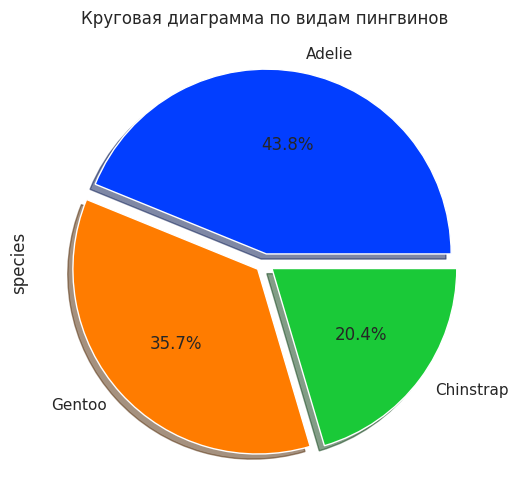

In [ ]:
import matplotlib.pyplot as plt

# palette_color = sns.color_palette('bright')
colors = sns.color_palette('bright')

# Нарисуем круговую диаграмму, отображающую %-ое соотношение пингвинов по видам
df['species'].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%', colors=colors, shadow=True, figsize=(6,6))
plt.title('Круговая диаграмма по видам пингвинов')
plt.show()

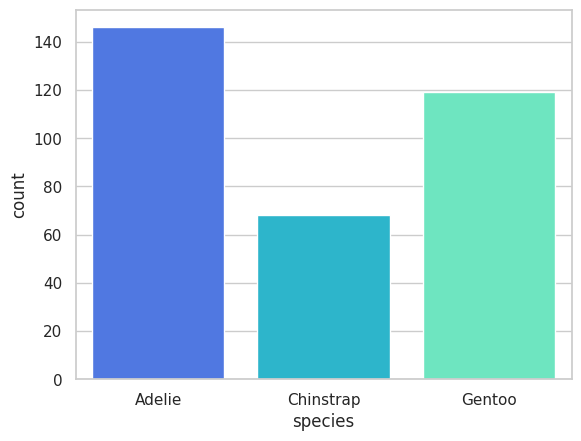

In [ ]:
# Построим столбчатую диаграмму для сравления количества пингвинов по видам:
sns.countplot(x='species', data=df);

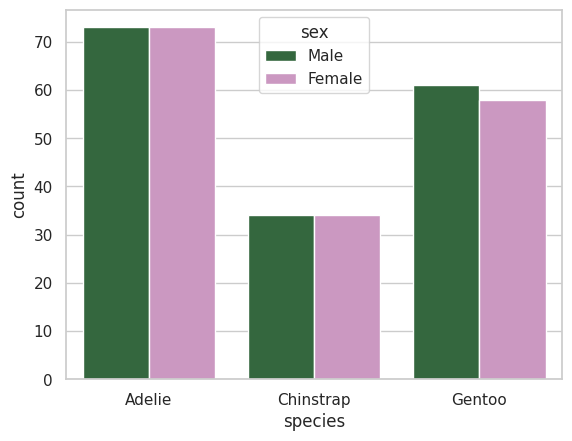

In [ ]:
# Построим столбчатую диаграмму для сравления количества пингвинов по видам:
sns.countplot(x='species', data=df,  hue='sex', palette='cubehelix');

Построение этой диаграммы показало, что по полу классы фактически сбалансированы – только у Генту немного больше особей мужского пола.

In [ ]:
# Посмотрим, на каких островах живут пингвины
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

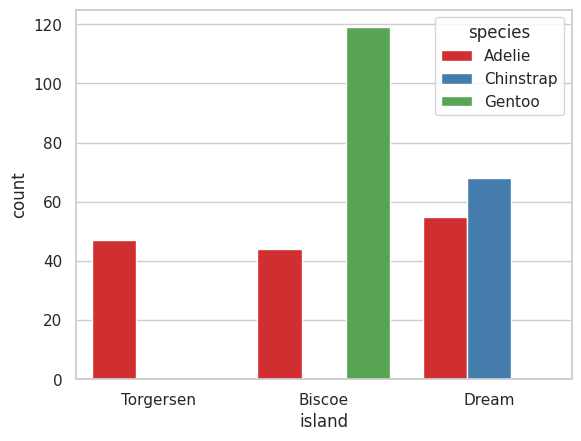

In [ ]:
# Построим столбчатую диаграмму - посмотрим кто где обитает:
sns.countplot(x='island', data=df,  hue='species', saturation=0.8, palette="Set1");

Видим, что пингвины вида Адели живут на всех трех островах, тогда как виды Чинстрап и Генту – локализованы каждый на «своем» острове.

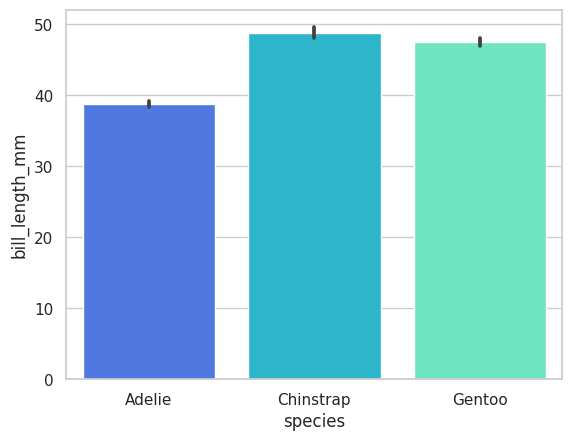

In [ ]:
# Посмотрим среднее значение bill_length_mm: длина клюва (мм)
sns.barplot(x='species', y='bill_length_mm', data=df);

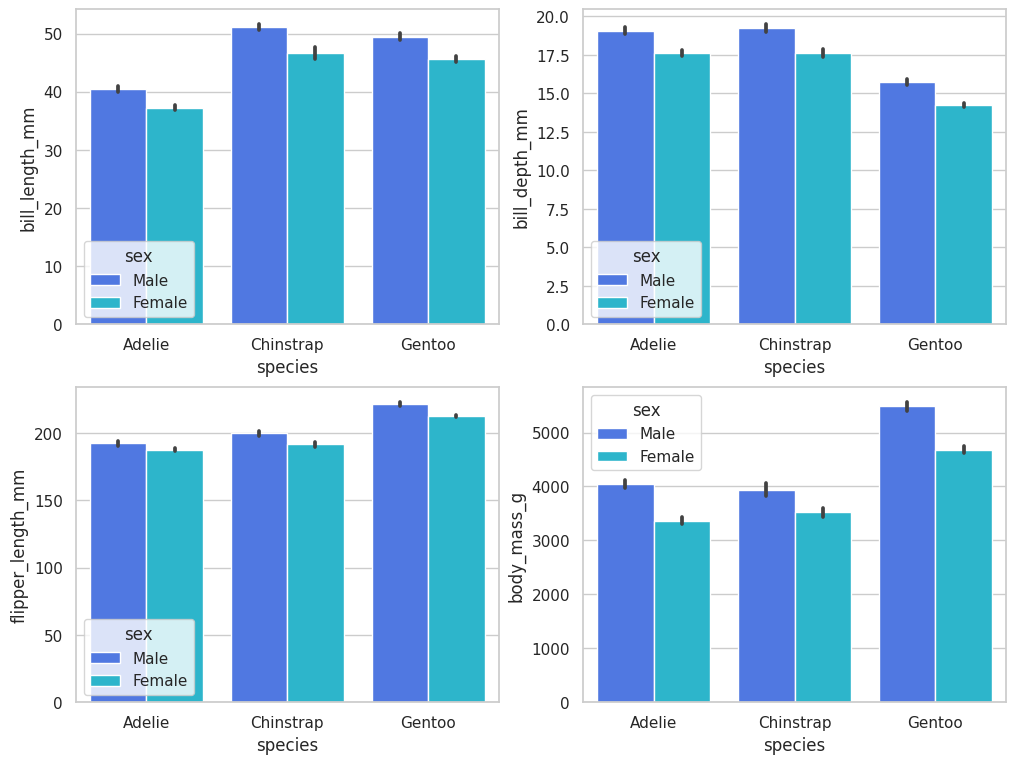

In [ ]:
# Вспомним наш опыт из Урока 1 и построим на одном полотне графики по всем параметрам:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
sns.barplot(x='species', y='bill_length_mm', hue='sex', data=df);

plt.subplot(2, 2, 2)
sns.barplot(x='species', y='bill_depth_mm', hue='sex', data=df);

plt.subplot(2, 2, 3)
sns.barplot(x='species', y='flipper_length_mm', hue='sex', data=df);

plt.subplot(2, 2, 4)
sns.barplot(x='species', y='body_mass_g', hue='sex', data=df);

Хорошо видно, средние параметры пингвинов Генту отличаются от параметров остальных видов - они имеют более длинный и тонкий клюв и массу тела, в среднем превышающую массу теха пингвинов других видов.
Средние значения параметров особей женского пола ниже, чем аналогичные показатели особей мужского пола.

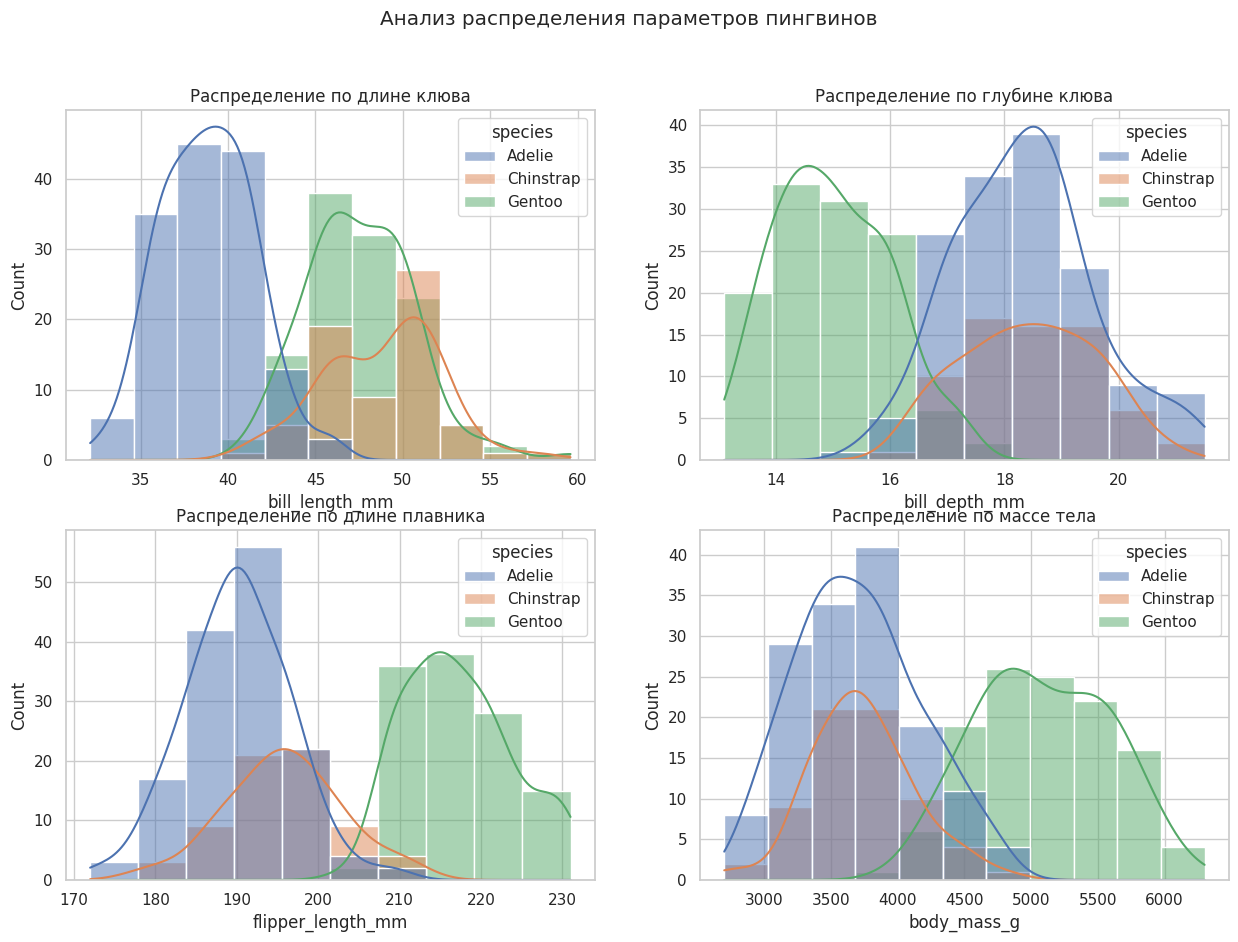

In [ ]:
# Установим стиль для графиок библиотеки seaborn
sns.set(style='whitegrid')

# Создание объектов фигуры и оси
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Построим распределение для параметров пингвинов.
sns.histplot(data=df, x='bill_length_mm', kde=True, color='blue', hue='species', ax=axs[0,0])
sns.histplot(data=df, x='bill_depth_mm', kde=True, color='green', hue='species', ax=axs[0,1])
sns.histplot(data=df, x='flipper_length_mm', kde=True, color='red', hue='species', ax=axs[1,0])
sns.histplot(data=df, x='body_mass_g', kde=True, color='orange', hue='species', ax=axs[1,1])

# Установим названия для графиков
axs[0,0].set_title('Распределение по длине клюва')
axs[0,1].set_title('Распределение по глубине клюва')
axs[1,0].set_title('Распределение по длине плавника')
axs[1,1].set_title('Распределение по массе тела')

# Установим общий заголовок
fig.suptitle('Анализ распределения параметров пингвинов')

# Нарисуем графики
plt.show()

Данные диаграммы подтверждают сделанные ранее выводы – средние параметры пингвинов Генту отличаются от параметров остальных видов. Мы видим, что пингвины Генту схожи с пингвинами Адели по трем признакам – массе, длине плавника и глубине клюва, отличаются лишь по длине клюва – отличаются лишь по лине клюва (по этому признаку они схожи с Чентсрап).

Можно визуализировать распределение по параметрам, используя функции **stripplot()** или **swarmplot()**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.1% of the points cannot be place

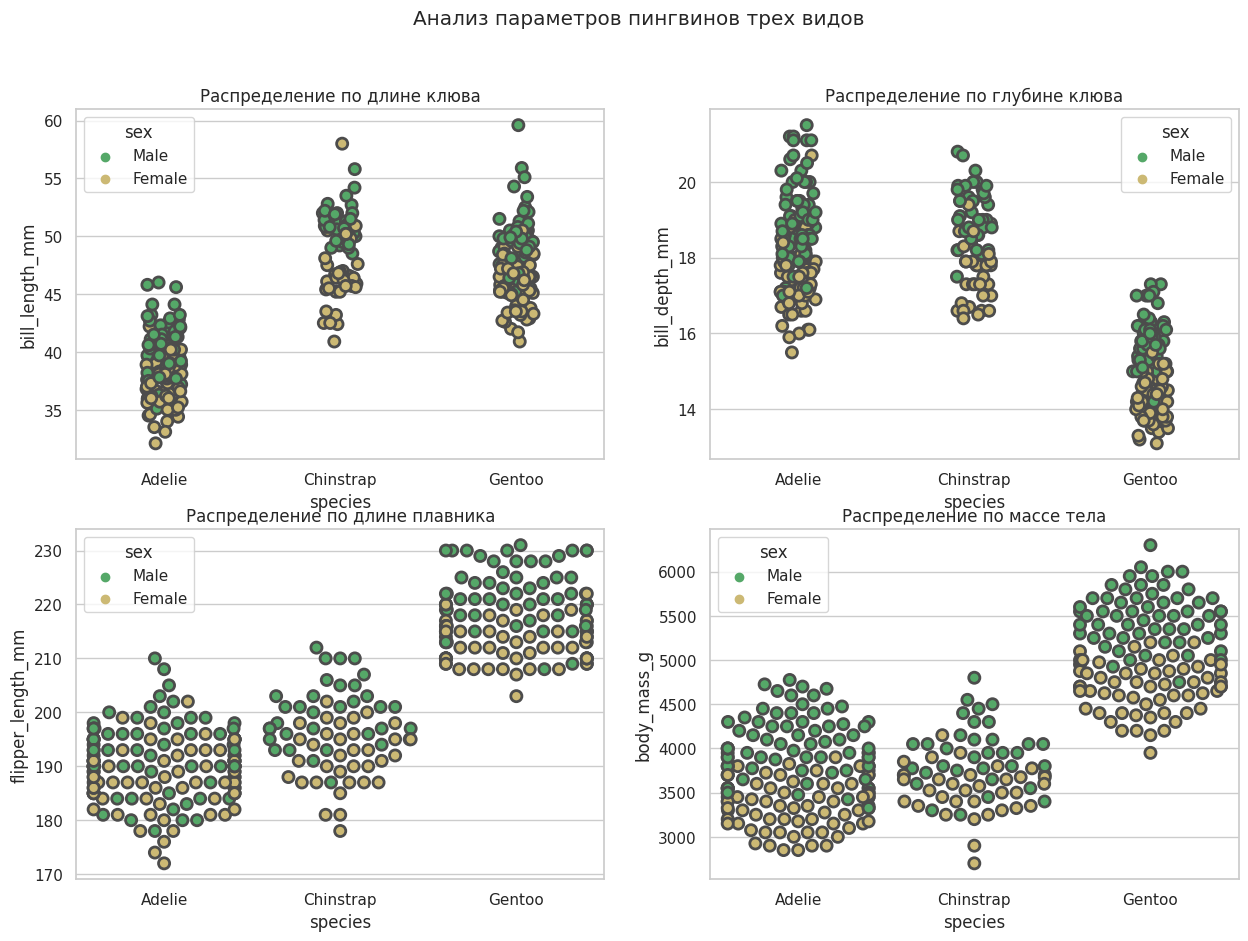

In [ ]:
# Создание объектов фигуры и оси
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Зададим самостоятельно цветовую палитру
color_palette = {"Male":"g", "Female":"y"}

# Построим распределение для параметров пингвинов.
sns.stripplot(data=df, x='species', y='bill_length_mm', hue = 'sex',  size=8, edgecolor="gray", palette=color_palette, linewidth=2, ax=axs[0,0])
sns.stripplot(data=df, x='species', y='bill_depth_mm', hue = 'sex', size=8, edgecolor="gray", palette=color_palette, linewidth=2, ax=axs[0,1])
sns.swarmplot(data=df, x='species', y='flipper_length_mm', hue = 'sex', size=8, edgecolor="gray", palette=color_palette, linewidth=2, ax=axs[1,0])
sns.swarmplot(data=df, x='species', y='body_mass_g', hue = 'sex', size=8, edgecolor="gray", palette=color_palette, linewidth=2, ax=axs[1,1])

# Установим названия для графиков
axs[0,0].set_title('Распределение по длине клюва')
axs[0,1].set_title('Распределение по глубине клюва')
axs[1,0].set_title('Распределение по длине плавника')
axs[1,1].set_title('Распределение по массе тела')

# Установим общий заголовок
fig.suptitle('Анализ параметров пингвинов трех видов')

# Нарисуем графики
plt.show();

Давайте посмотрим, различаются параметры пингвинов Адели, живущих на разных островах? Дополнительно еще разделим их по полу.

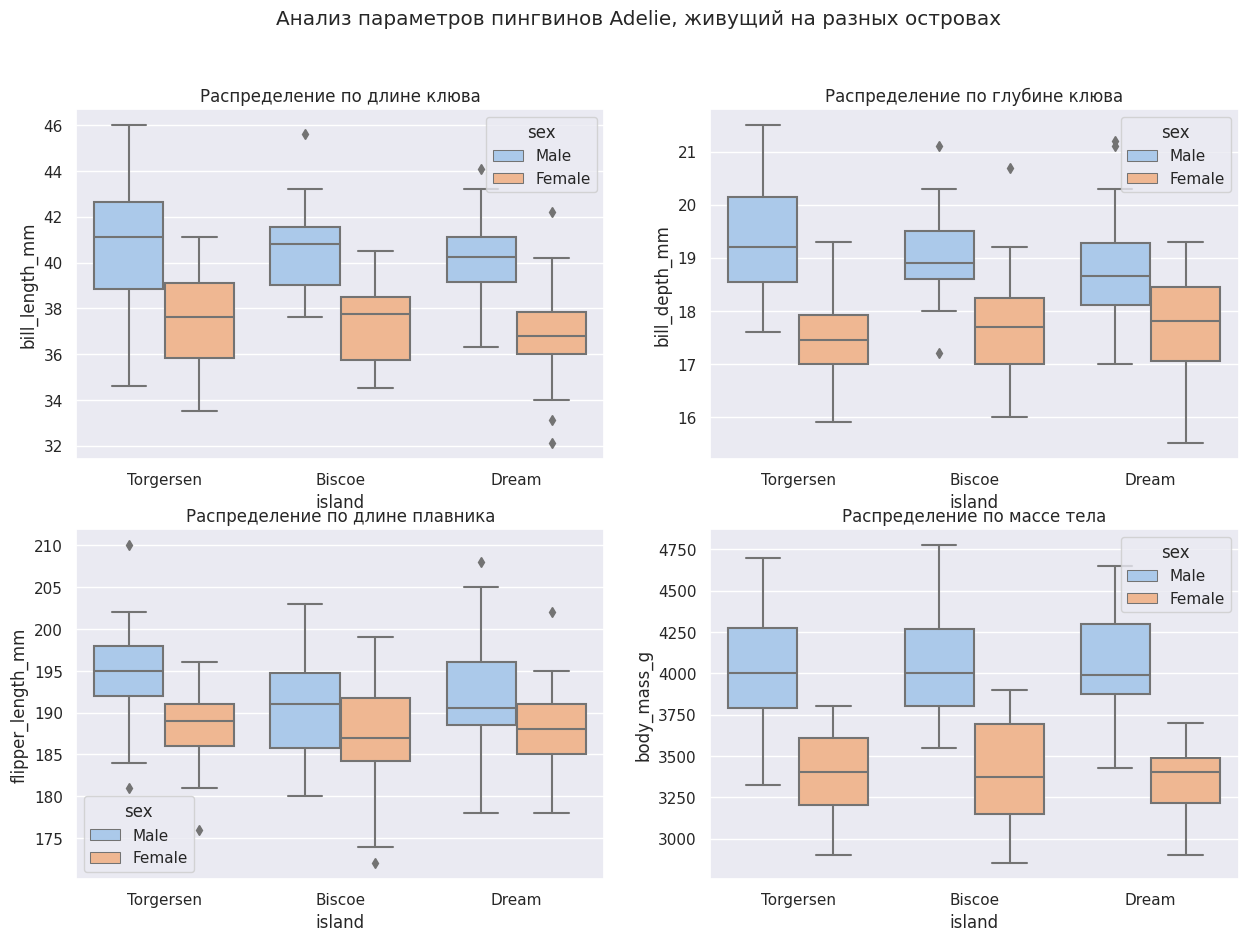

In [ ]:
# Установим стиль для графиок библиотеки seaborn
sns.set(style='darkgrid')

# Создание объектов фигуры и оси
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Установим палитру
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
sns.set_palette('pastel')

# Построим распределение возраста, годового дохода и оценки расходов.
sns.boxplot(data=df[(df.species == 'Adelie')], x='island', y='bill_length_mm', hue = 'sex', ax=axs[0,0])
sns.boxplot(data=df[(df.species == 'Adelie')], x='island', y='bill_depth_mm', hue = 'sex', ax=axs[0,1])
sns.boxplot(data=df[(df.species == 'Adelie')], x='island', y='flipper_length_mm', hue = 'sex', ax=axs[1,0])
sns.boxplot(data=df[(df.species == 'Adelie')], x='island', y='body_mass_g', hue = 'sex', ax=axs[1,1])

# Установим названия для графиков
axs[0,0].set_title('Распределение по длине клюва')
axs[0,1].set_title('Распределение по глубине клюва')
axs[1,0].set_title('Распределение по длине плавника')
axs[1,1].set_title('Распределение по массе тела')

# Установим общий заголовок
fig.suptitle('Анализ параметров пингвинов Adelie, живущий на разных островах')

# Нарисуем графики
plt.show()

Отметим, что по всем 4 признакам, в среднем (медианы одинаковые), нет различий для особей, живущих на разных островах. Тем не мнее, есть пингвины, отличающиеся по параметрам от «среднего пингвина». На диаграммах они отмечены как «выбросы». Будем считать это нормой – среди людей тоже попадаются «слишком низкие», «слишком высокие», «с большим носом» и т.п.

Главный вывод - живущие на разных островах пингвины одного вида не имеют различия в параметрах.

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

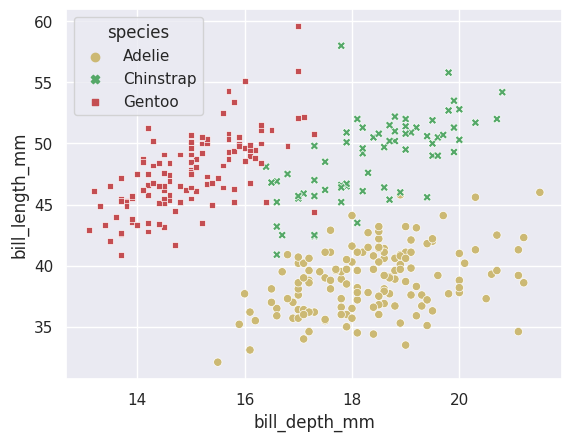

In [ ]:
# Зададим свой набор цветов:
cmap={'Adelie':'y', 'Chinstrap':'g', 'Gentoo': 'r'}

sns.scatterplot(x='bill_depth_mm', y='bill_length_mm', hue='species', style='species', palette=cmap, data=df)

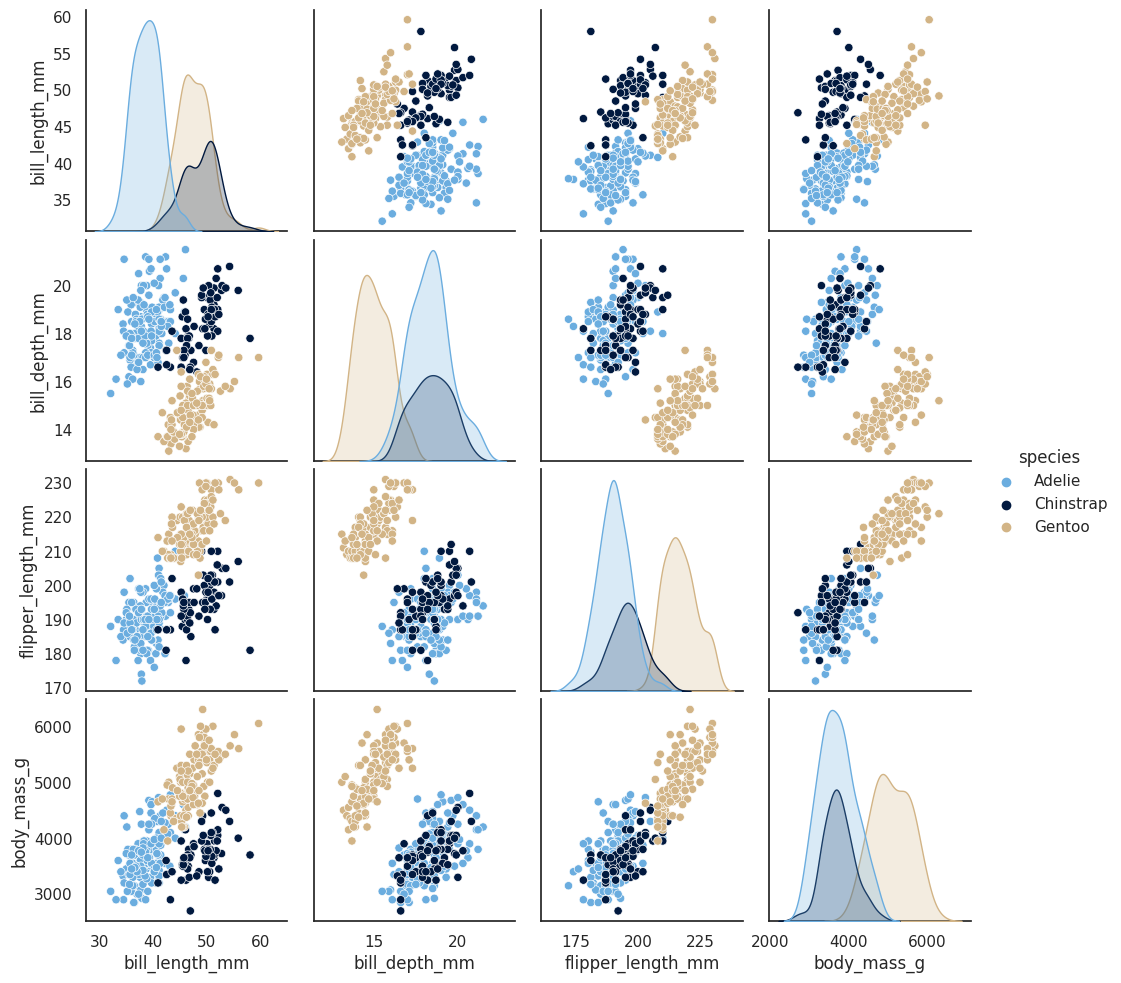

In [ ]:
sns.set_style(style='white')
sns.pairplot(data=df,hue='species',palette=['#6baddf','#01193f','#d2b486'])

Эта диаграмма также показывает, что пингвины Генту более отличаются от пингвинов других видов. Также мы можем отметить наличие некоторых связей, например:

•	чем длиннее клюв, тем больше его высота;

•	чем больше масса тела, тем длиннее плавник;

•	чем больше масса, тем больше глубина клюва и т.п.



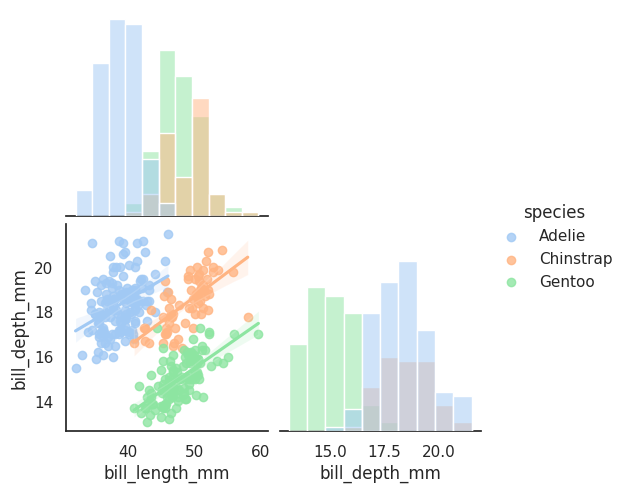

In [ ]:
sns.set_style(style='white')
sns.pairplot(data=df,hue='species', kind='reg', diag_kind='hist',  vars=["bill_length_mm", "bill_depth_mm"], corner=True)

Построим линию регрессии зависимости длины плавника (flipper_length_mm) от массы тела пингвинов (body_mass_g). Через параметры x и y передаём названия признаков, через data – набор данных.

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

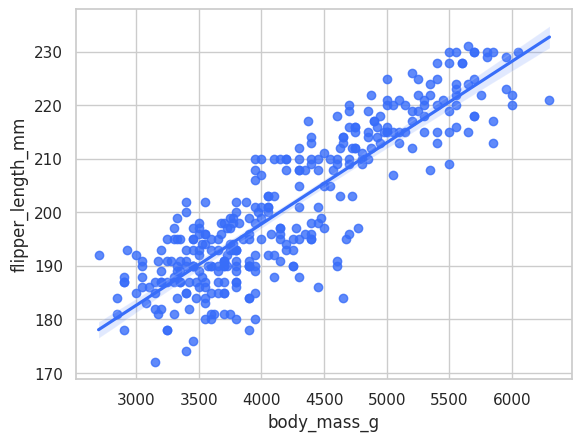

In [ ]:
sns.set_palette('rainbow')
sns.set_style("whitegrid")

sns.regplot(x="body_mass_g", y="flipper_length_mm", data=df)

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

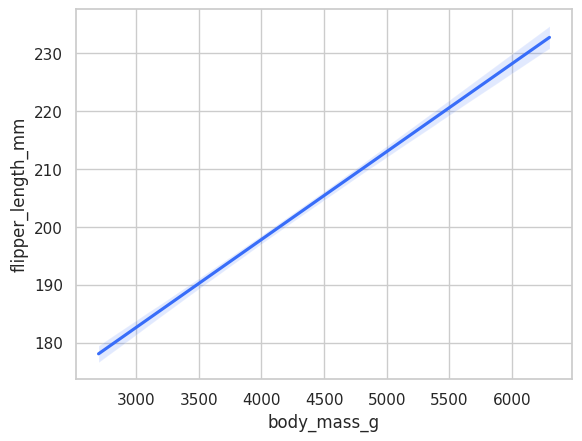

In [ ]:
sns.regplot(x="body_mass_g", y="flipper_length_mm", scatter=False, data=df)

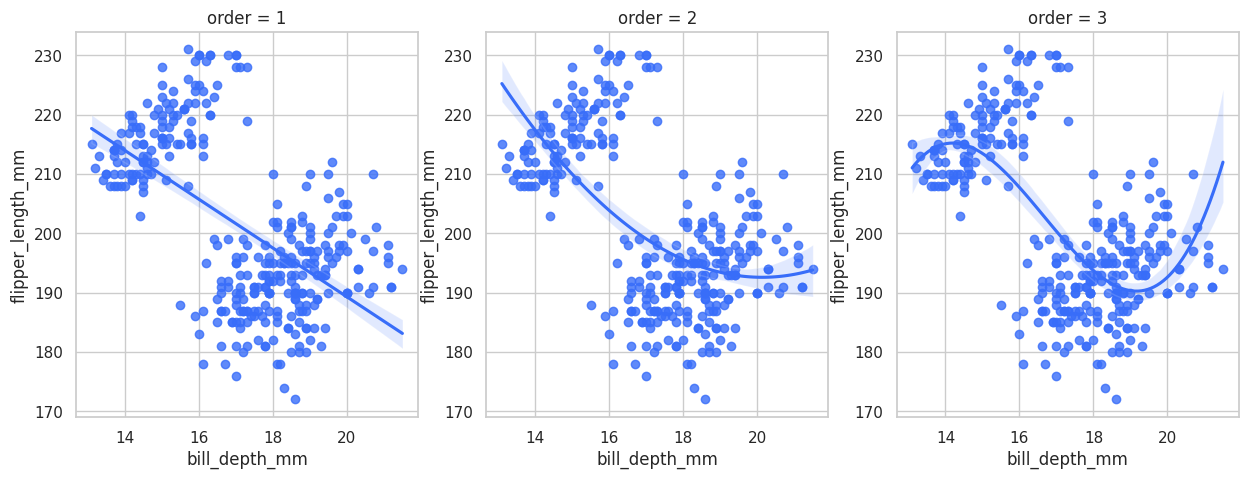

In [ ]:
order=[1, 2, 3]
plt.figure(figsize=(15, 5))
for i, o in enumerate(order):
 plt.subplot(1, len(order), i+1)
 plt.title(f"order = {o}")
 sns.regplot(x="bill_depth_mm", y="flipper_length_mm", order=o, data=df)

**Lmplot()** – это функция, которая объединяет regplot() с фасетным графиком, позволяя строить несколько графиков регрессии на одном рисунке.

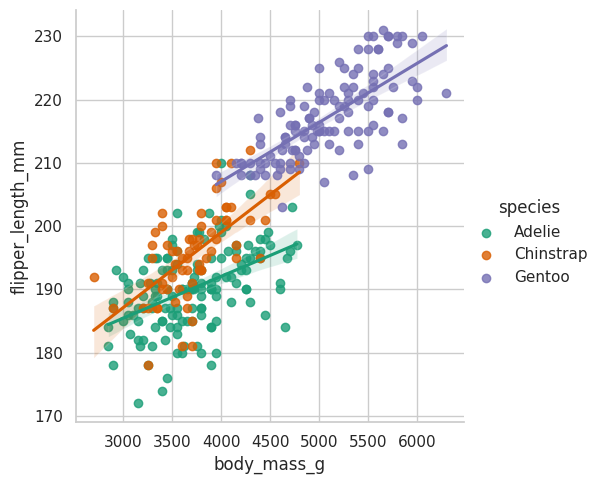

In [ ]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="species", palette="Dark2", data=df)

Представим графики для каждого отдельного значения species на
разных полях с горизонтальным разделением:

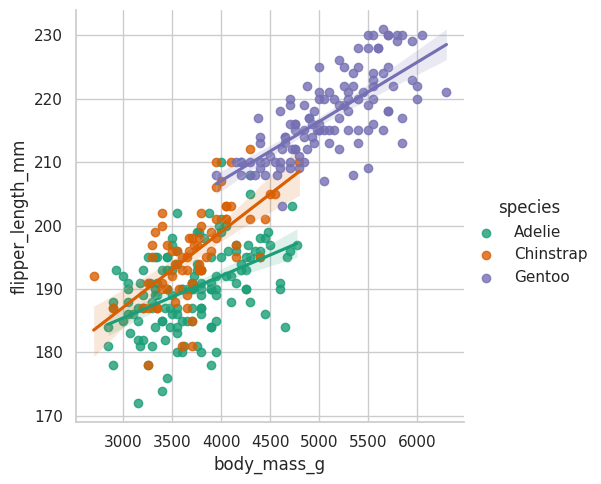

In [ ]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="species", palette="Dark2", data=df)

В этих графиках единый масштаб осей для всех признаков. Можно "подстроить" оси для каждого признака, используя параметр **facet_kws**.
Параметры **sharex** и **sharey** отвечают за отображение осей x и y на всех диаграммах.

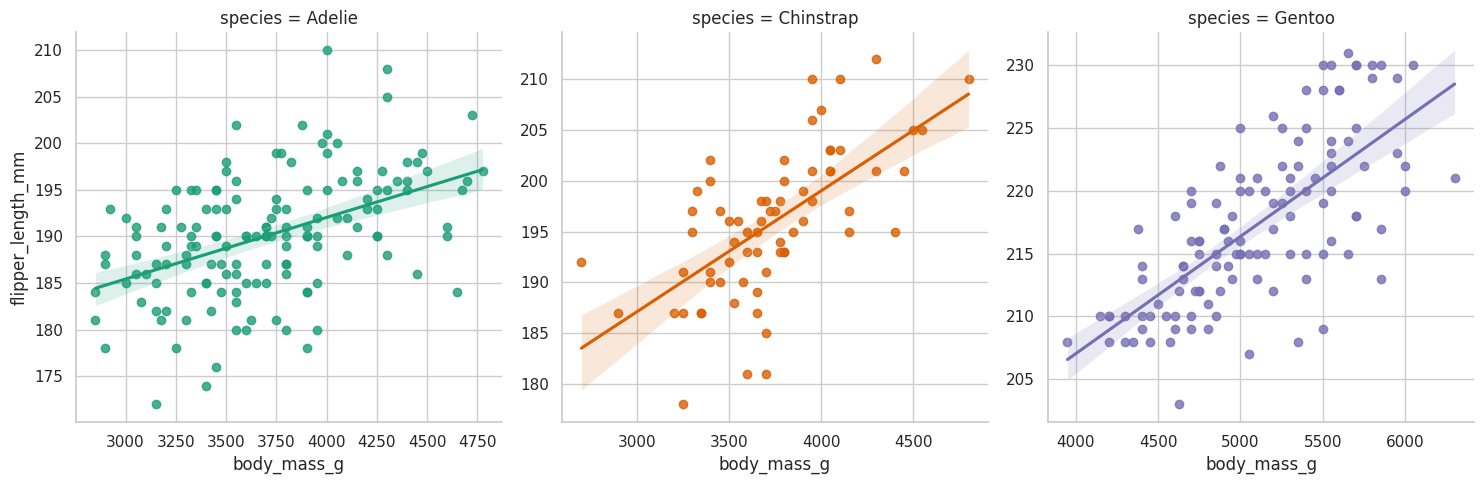

In [ ]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", palette="Dark2", hue="species", col="species",
           facet_kws={'sharex':False, 'sharey':False}, data=df)

А можно разделить графики по признаку "Пол". Получим такую визуализацию:

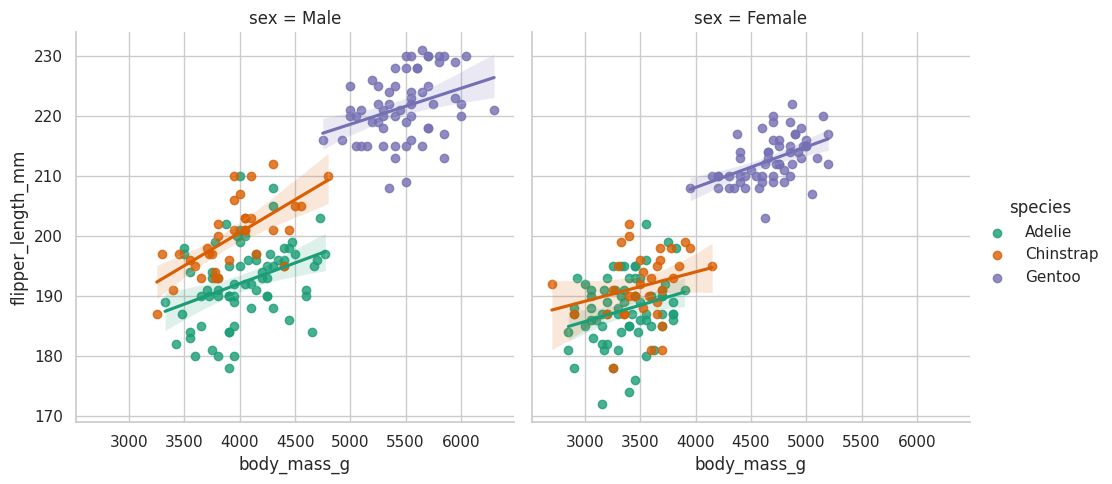

In [ ]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="species", palette="Dark2", col="sex", data=df)

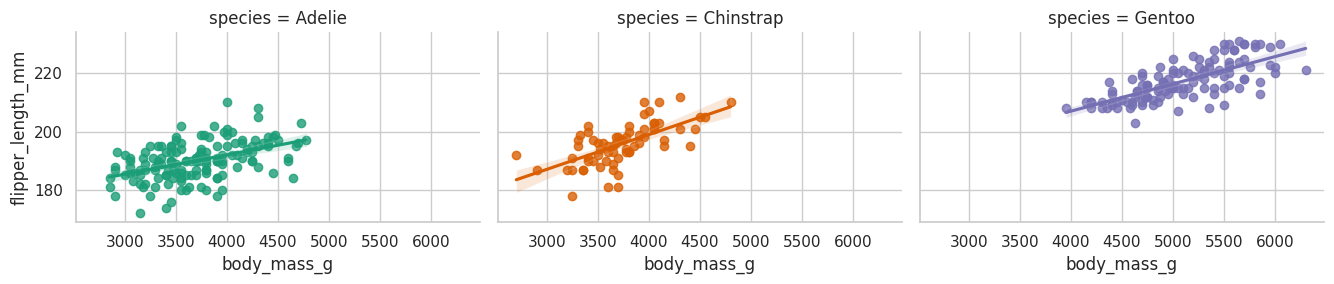

In [ ]:
# Для управления размером диаграмм используйте параметры height (высота) и aspect (соотношение сторон):
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="species", palette="Dark2", col="species", height=3, aspect=1.5, data=df)

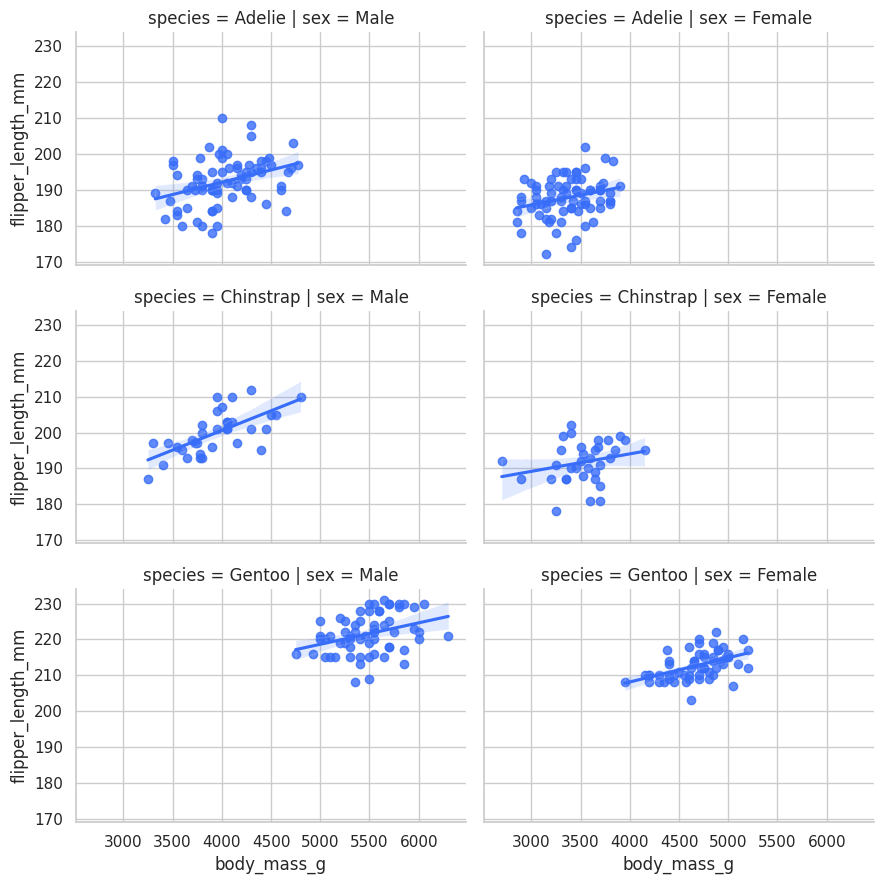

In [ ]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", palette="bright",
           col="sex", row ='species', height=3, aspect=1.5, data=df)

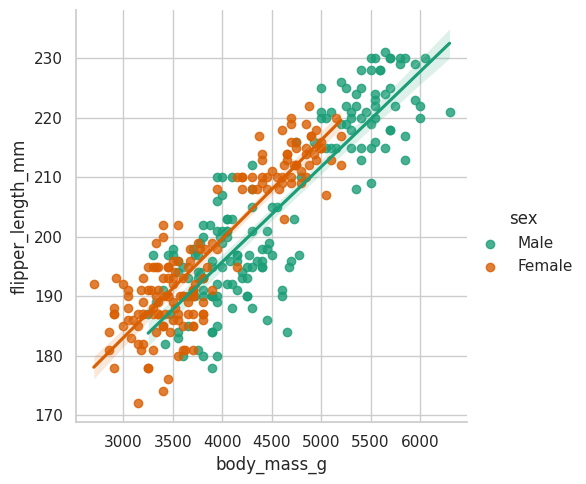

In [ ]:
sns.lmplot(x="body_mass_g", y="flipper_length_mm", hue="sex", palette="Dark2", data=df)

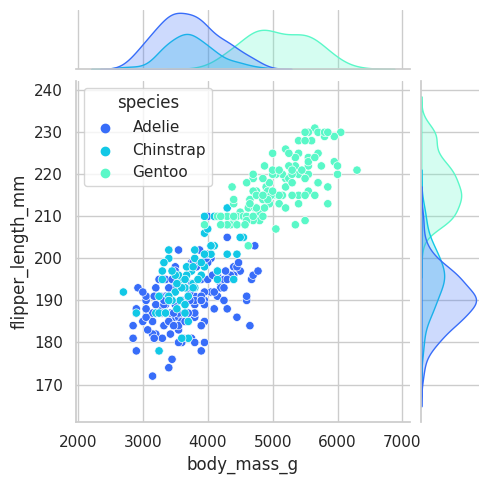

In [ ]:
sns.jointplot(x="body_mass_g", y="flipper_length_mm", hue="species", height=5, data=df)

Эта диаграмма дает возможность получить сразу несколько типов полезной информации – о характере связи между признаками и типе распределения признаков.

Например, здесь мы видим, что существует предположительно линейная зависимость между длиной плавника и массой тела пингвинов всех трех типов. А также разница в параметрах – пингвины Генту имеют средняя масса тела = 5000 г при средней длине плавника = 215 мм. Пингвины Адели и Чинстрап более схожи по параметрам – средняя масса тела = 3500 г и средняя длина плавника 190-195 мм.


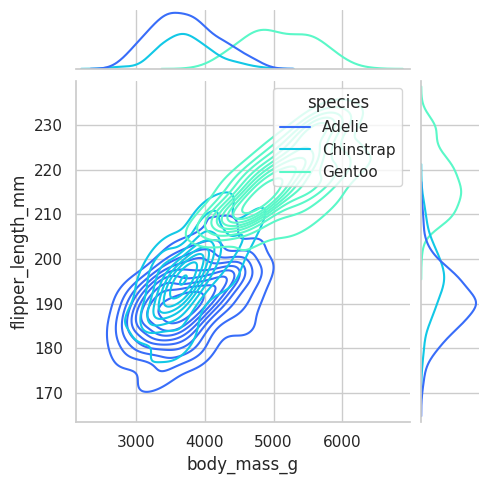

In [ ]:
sns.jointplot(data=df, x="body_mass_g", y="flipper_length_mm", hue="species", height=5, kind="kde")

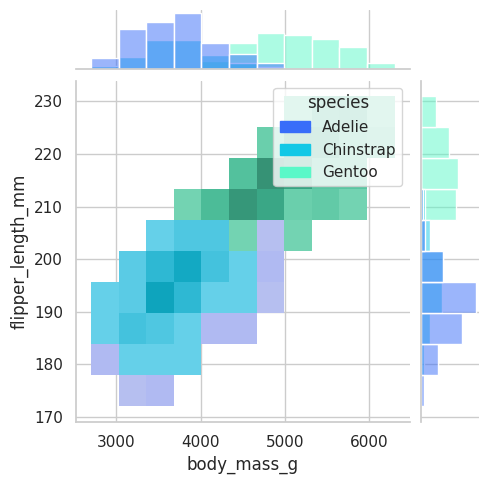

In [ ]:
sns.jointplot(data=df, x="body_mass_g", y="flipper_length_mm", hue="species", height=5, kind="hist")

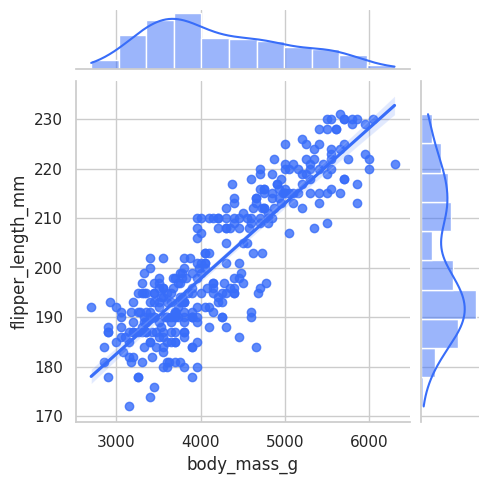

In [ ]:
sns.jointplot(data=df, x="body_mass_g", y="flipper_length_mm", height=5, kind="reg")

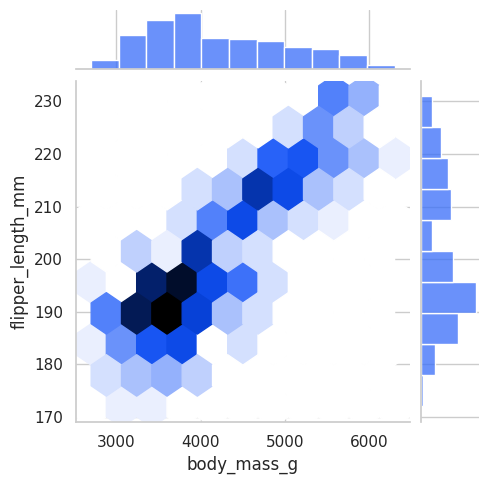

In [ ]:
sns.jointplot(data=df, x="body_mass_g", y="flipper_length_mm", height=5, kind="hex")

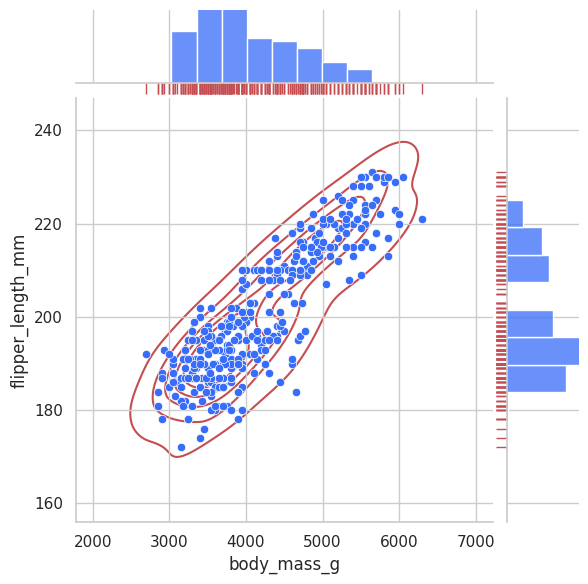

In [ ]:
g = sns.jointplot(data=df, x="body_mass_g", y="flipper_length_mm")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [ ]:
df.corr(method='pearson', numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

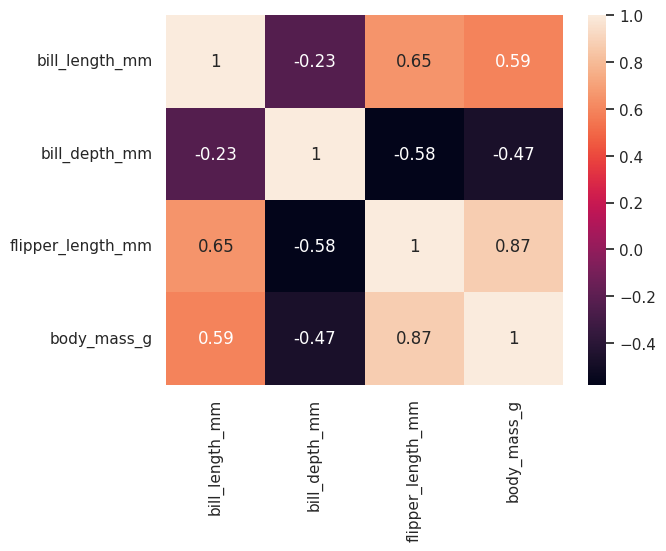

In [ ]:
sns.heatmap(df.corr(method='pearson', numeric_only=True),annot = True)